In [18]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
datos = pd.read_csv('andSVM.csv')
datos.head()

,X1,X2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1
4,2,3,1


In [4]:
X = datos[['X1', 'X2']]
Y = datos['y']
clf = LinearSVC()
clf.fit(X,Y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [5]:
print(clf.predict([[1, 1]]))

[1]


### Visualizamos la barrera de decisión

In [12]:
W = clf.coef_[0]
a = -W[0]/W[1]
I = clf.intercept_
b = I[0]/W[1]

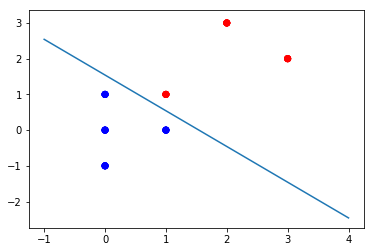

In [13]:
y = a * np.linspace(-1,4) - b
plt.plot(np.linspace(-1,4),y,'-')
plt.scatter(X['X1'],X['X2'], c=['red' if i==1 else 'blue' for i in Y])

### Entrenamos uno nuevo para puntos en el circulo

In [17]:
x1 = np.random.uniform(-1.25,1.25,10000)
x2 = np.random.uniform(-1.25,1.25,10000)
y = x1**2 + x2**2 <= 1
y = y.astype(int)
X=np.asarray([[x1[i],x2[i]] for i in range(0,len(x1))])
Y=np.asarray([[elem] for elem in y])

In [30]:
clf2 = SVC(kernel='rbf')
clf2.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
pred = clf2.predict(X)

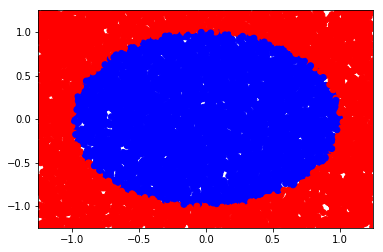

In [33]:
plt.scatter(x1, x2, c=['red' if i < 0.5 else 'blue' for i in pred])
plt.ylim([-1.25,1.25])
plt.xlim([-1.25,1.25])
plt.show()

Comparando con la red neuronal, vemos que los dos dan resultados satisfactorios, siendo el SVM tal vez mas rápido a la hora de entrenar

#### Clasificacion usando nnet - ejercicio anterior 

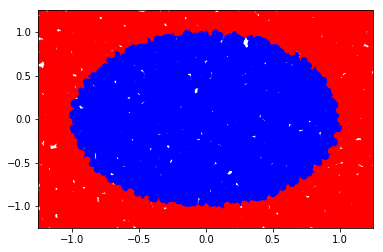